---
# Decision Tree Implementation

In this module, we will utilize the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/tree.html#regression) module from sci-kit learn. This will allow us to rapidly develop a model and use the built in model metrics to develop and compare our model quickly and easily.

This project will follow the 4 phase process of a typical machine learning project.

Phase 1: Data Cleaning/Analysis

Phase 2: Train the model

Phase 3: Test the model

Phase 4: Compare the results

---
# Phase 1 - Data Cleaning/Analysis

Our [data](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) is a set of real estate valuates from New Taipei City,Taiwan. We will first load a dataframe and inspect the data

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load data
data_df = pd.read_csv("Real Estate.csv")

# initial inspection of the data
data_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


---
## Visualization

The dataset has 6 features and 1 output. We cannot visualize 6-dimensional data, however we can inspect each feature against the output to identify any important correlations between the features. 

Number of columns: 8


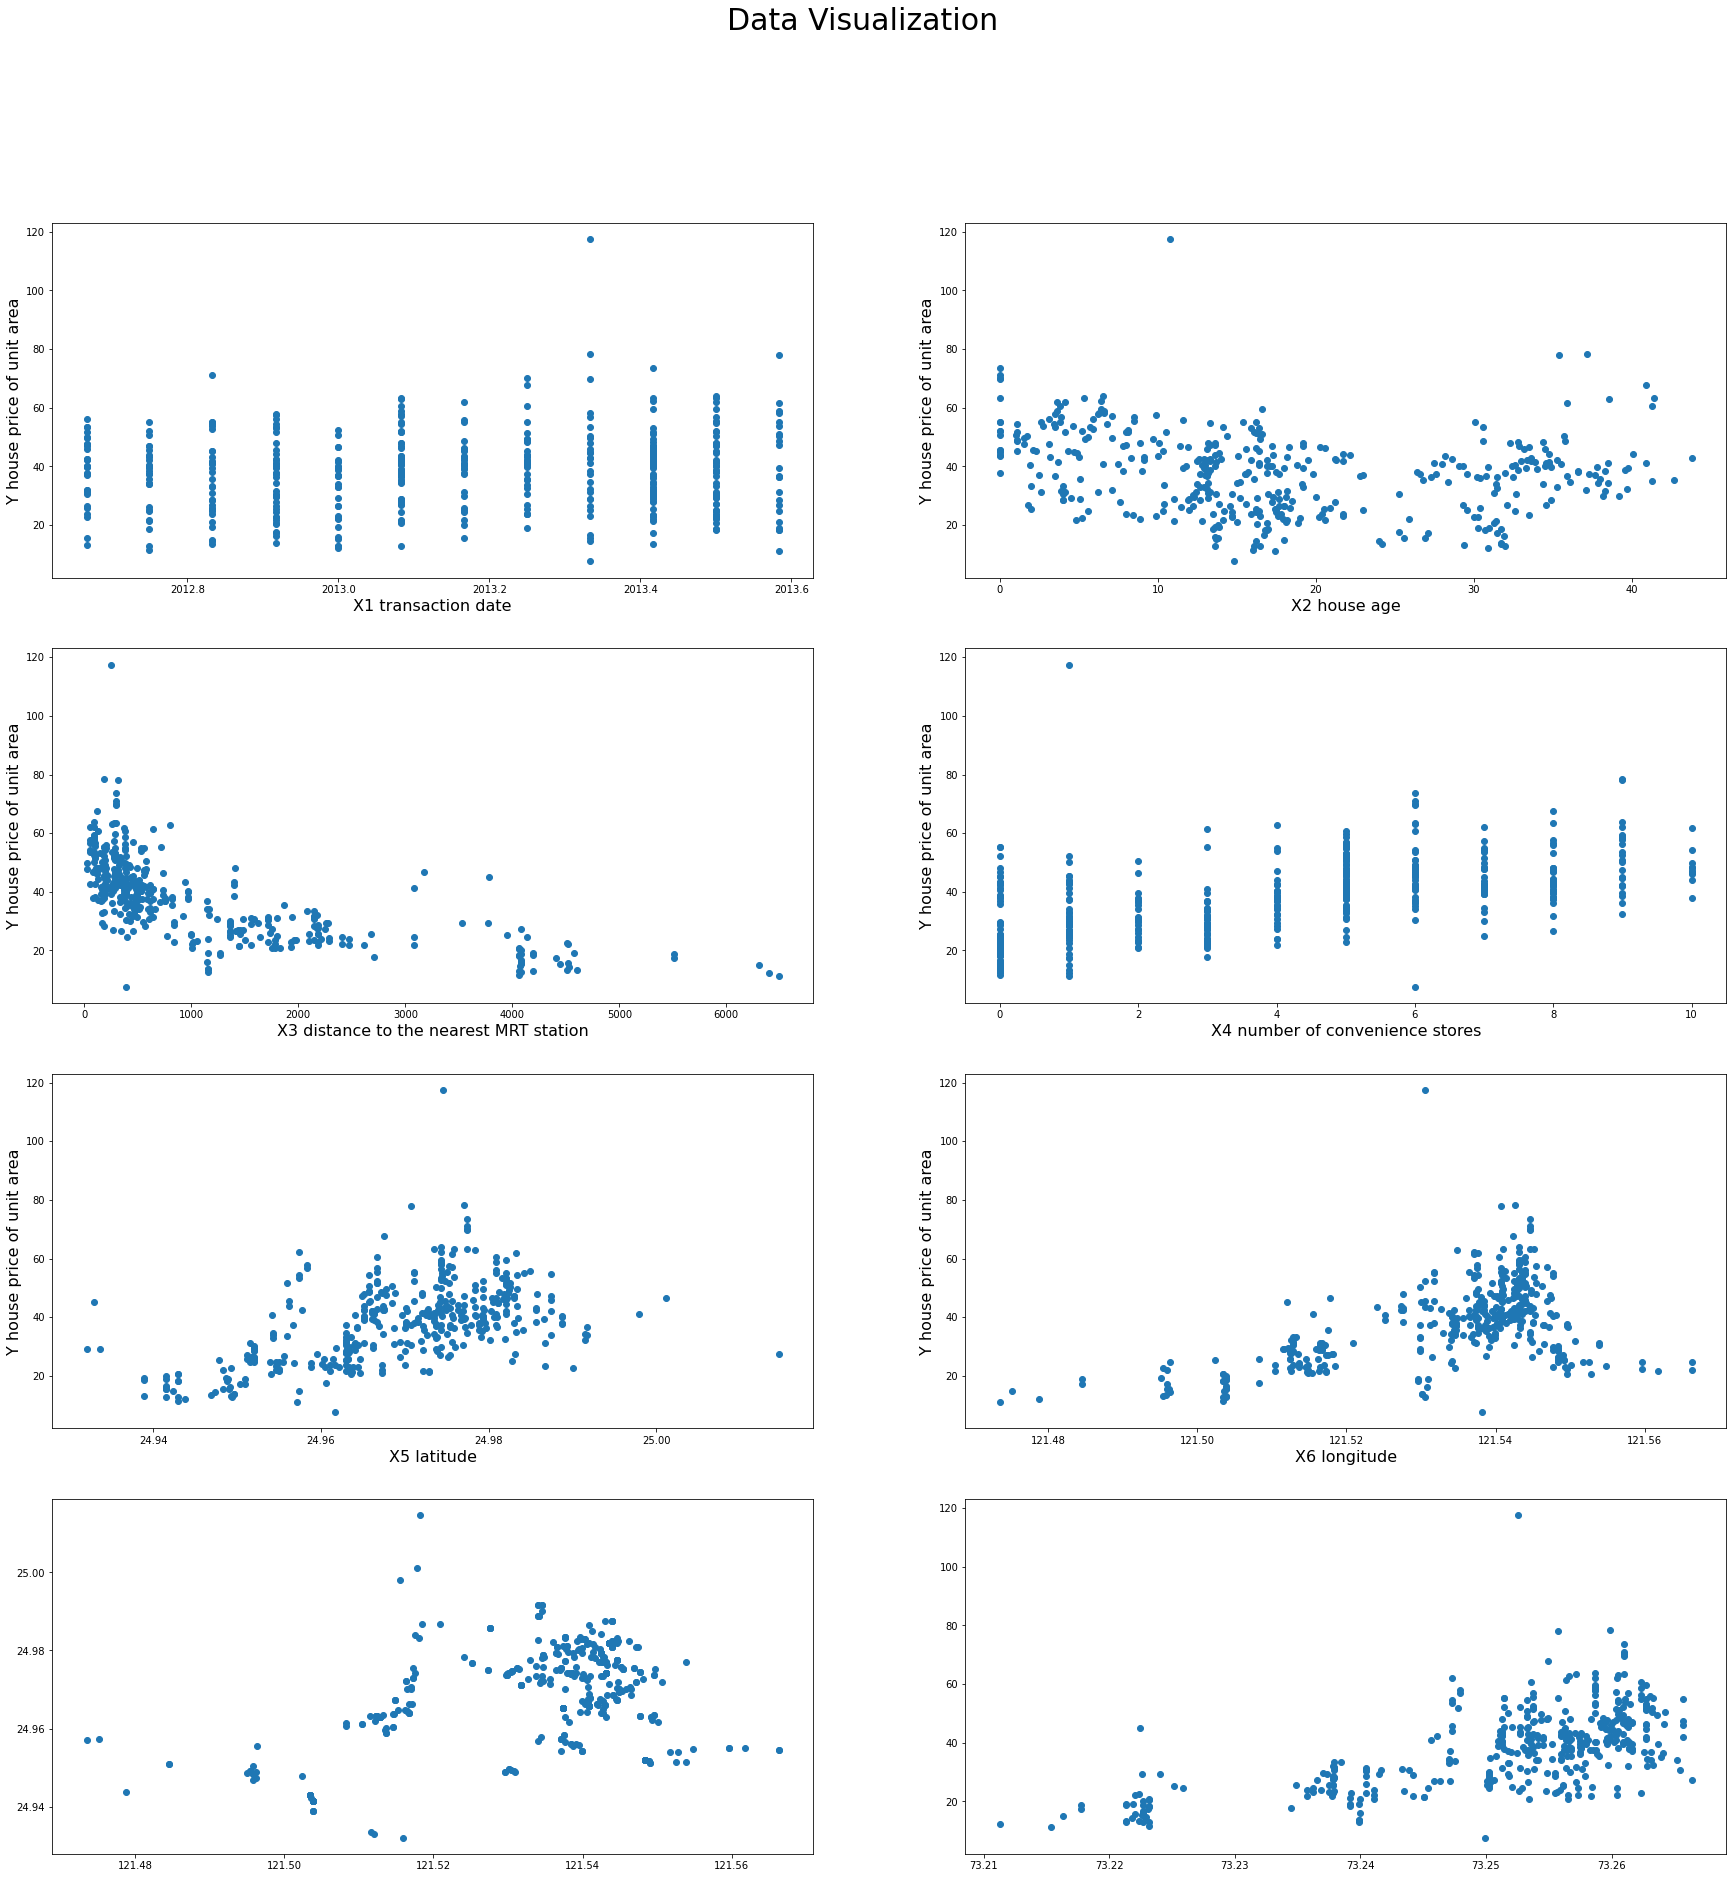

In [143]:
print(f"Number of columns: {data_df.shape[1]}")

# Plot data to identify trends
fig, axs = plt.subplots(4,2)

# Need a big figure
fig.set_size_inches(30, 30)

# Label figure
fig.suptitle("Data Visualization", fontsize = 30)
label = data_df.columns[-1]

i = 0
j = 0

# Plot each feature against the price/sqft
for feature in data_df.columns[1:-1]:
    axs[i,j].scatter(data_df[feature], data_df[label])
    axs[i,j].set_xlabel(feature, fontsize = 16)
    axs[i,j].set_ylabel(label, fontsize = 16)

    # These are not the droids you're looking for
    j += 1
    if j > 1:
        j = 0
        i += 1
    if i > 2:
        i = 0

# Plot by long/lat to see how the houses are arranged in the city    
axs[3,0].scatter(data_df["X6 longitude"], data_df["X5 latitude"])

# Experiment with averaging long/lat and ploting against housing per sqft
axs[3,1].scatter((data_df["X5 latitude"] + data_df["X6 longitude"])/2, data_df["Y house price of unit area"])

Longitude and latitude are combined together into a coordinate. While each seperately may yeild some information about the potential output, a combination of the two should give much more information about the output. We can plot longitude and latitude against the output using a 3-d plot. 

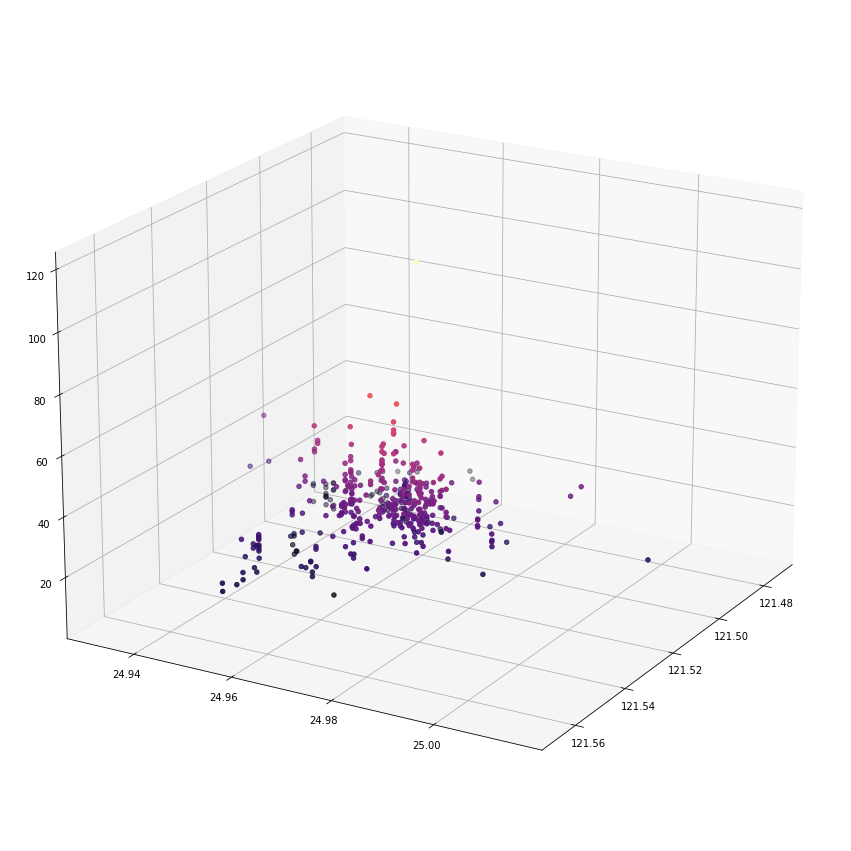

In [144]:
# Visualize a 3D plot of long/lat and housing price

fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(projection = '3d')
ax.scatter3D(data_df["X6 longitude"], data_df["X5 latitude"], data_df["Y house price of unit area"], c = data_df["Y house price of unit area"], cmap = 'magma')
ax.view_init(20, 30)


In [145]:
# toss the 'No' column, just lists the number of houses not a real datapoint
data_df = data_df.drop(['No'], axis = 1)

scaler = StandardScaler()

for feature in data_df.columns[:-1]:
    data_df[[feature]] = scaler.fit_transform(data_df[[feature]])

data_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,37.9
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,42.2
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,47.3
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,54.8
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,43.1
...,...,...,...,...,...,...,...
409,-0.528967,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,15.4
410,-1.711384,-1.064493,-0.788071,1.667503,0.427579,0.635341,50.0
411,0.358734,0.095568,-0.549678,0.987694,0.822893,0.423972,40.6
412,-0.528967,-0.844784,-0.776684,0.307885,-0.184755,0.476814,52.5


No single feature is strongly correlated with the observed outputs, however there are loose assosiciations that may allow us to find a linear association between the features and outputs. 

---

## Data Regularization
The next step in our project is to regularize the data. This reduces the spread of each features and reduces the range between features. I.e. if one feature is number of bedrooms (1-5), and another is total square footage (1000 - 5000), the difference in magnitude of each feature is enormous. By regularizing the data, we develop simlar scales between the data. 

In this step, we will also split the data into features and outputs and shuffle and divide the data into a training set and test set.

We will regularize the data using the equation:
$
\Large Z = \dfrac{\bar{X} - \mu}{\sigma}
$

In [146]:
# Append column of 1s for bias
data_df.insert(0, 'Bias', np.ones(data_df.shape[0]), True)
data_df.head()


,Bias,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,37.9
1,1.0,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,42.2
2,1.0,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,47.3
3,1.0,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,54.8
4,1.0,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,43.1


---
## Splitting Data

Next, we must partition the data so we can train on a subset, then test and verify our model with a partition the model was not tuned on. This enhances our ability to know if our model has overfit the training data and understand the accuracy of future predictions. Here, we will partition 2/3rds of the data to train on, and 1/3 of the data to test and verify on. Once our data has been shuffled and split, it is ready for use.

In [147]:
# Split data into x = features and y = labels
y = data_df.iloc[:,-1]

X = data_df.iloc[:,:-1]

# Split into train, validate, test data. Shuffle data for better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle=True, random_state=42)
X_train, X_Validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.33, shuffle = True, random_state=42)


---
## Phase 2&3: Train and test the Model
In this project, we will implement the [Decision Tree Regression](https://scikit-learn.org/stable/modules/tree.html#regression) algorithm from scikit-learn. Sci-kit Learn is a machine learning library with a large variety of easy to implement machine learning tools and algorithms. Implementation is as easy as importing and calling the desired tool. Scikit-learn is a great resource for any machine learning project from data analysis to implementation, to performance and error analysis. 

In this model, we will import and configure the Decision tree Regression algorithm. Once an instance is created, we pass the reference data using the "fit" function. 



MSE:  85.70831244081477
MSE:  70.22624012761389
MSE:  59.15137827211932
MSE:  64.19145086971992
MSE:  59.77435226911414
MSE:  66.60651057459714
MSE:  60.211338388472775
MSE:  63.045844675555024
MSE:  60.122295688069876


C:\Users\carmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\carmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\carmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\carmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but 

Text(0.5, 1.0, 'Max Depth vs MSE')

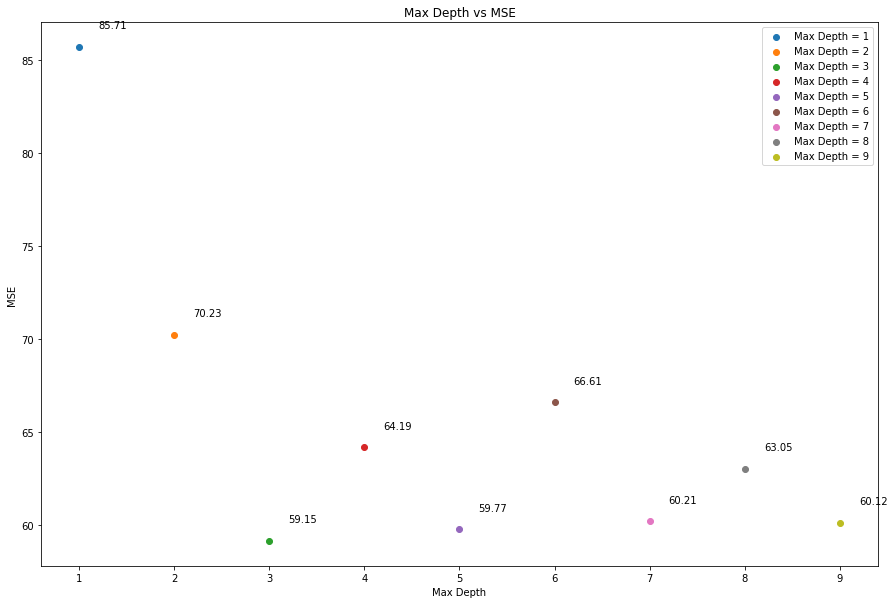

In [182]:
# Import the KNN regression module
from sklearn import tree
import sklearn.metrics as metrics

fig, ax = plt.subplots(1,1, figsize = (15,10))


for i in range (1, 10):
    reg = tree.DecisionTreeRegressor(max_depth = i, random_state = 0)
    reg.fit(X_train, y_train)
    y_hat = reg.predict(X_test)
    error = metrics.mean_squared_error(y_test, y_hat)
    print("MSE: ", error)
    ax.scatter(i,error, label = "Max Depth = " +str(i))
    ax.text(i+.2, error+1, str(np.round(error,2)))

ax.legend()
ax.set_xlabel("Max Depth")
ax.set_ylabel("MSE")
ax.set_title("Max Depth vs MSE")

The best performing depth is a max depth of 3. This provides an MSE of 59.15. The depths of the tree is important because it prevents overfitting of the data.

---
# Performance evaluation
Now that we have tuned the best depth, we can predict against the test set to determine how well our model performs. 

C:\Users\carmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


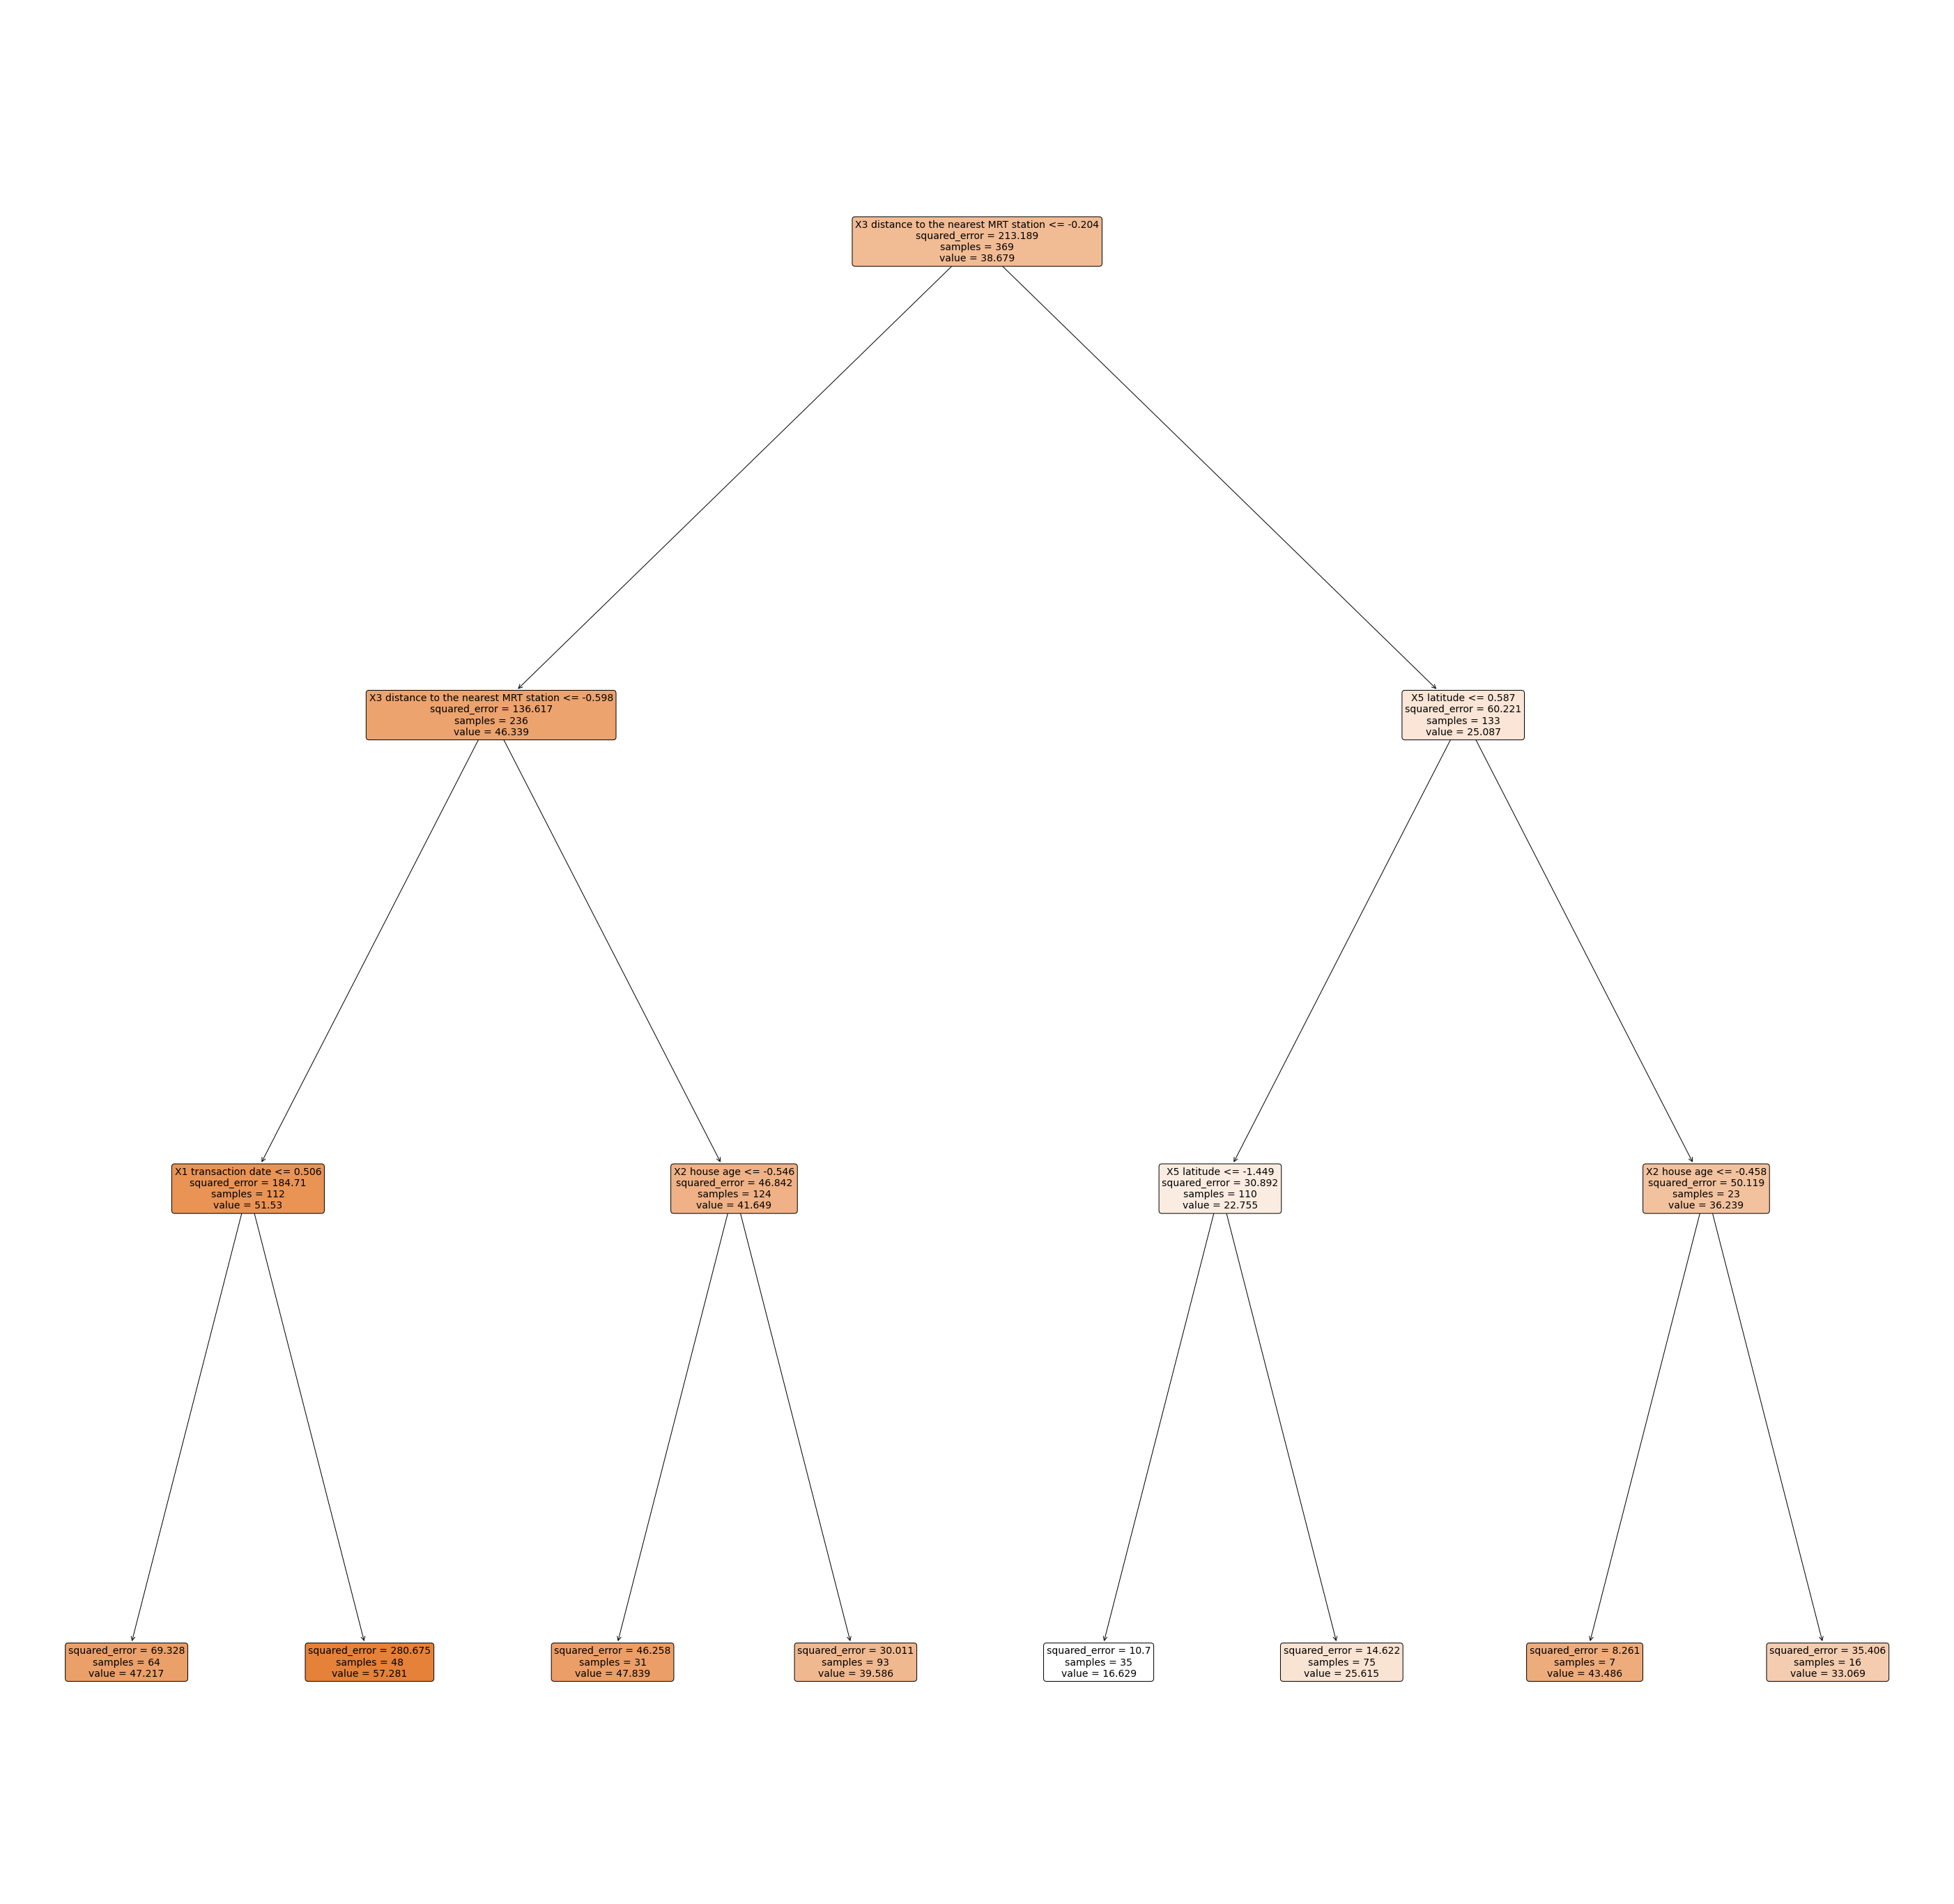

In [183]:
plt.figure(figsize = (50,50))

reg = tree.DecisionTreeRegressor(max_depth = 3)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)
error = metrics.mean_squared_error(y_test, y_hat)

a = tree.plot_tree(reg, 
                   feature_names = data_df.columns,  
                   rounded = True, 
                   filled = True, 
                   fontsize = 14)


In [184]:
# MSE
MSE = metrics.mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# MAE
MAE = metrics.mean_absolute_error(y_test, y_hat)
print(f"Mean Absolute Error: {np.round(MAE,2)}")


Mean Squared Error: 59.15
Mean Absolute Error: 5.47


## Phase 4: Model Comparison

The scores for classification models are below:
- Linear Regression (best of variations: Elastic Net): 
    - MSE = 69.6
    - MAE = 6.02
- Gradient Descent: 
    - MSE = 70.32
    - MAE = 6.0
- K-Nearest Neighbors Regression (KNN)*: 
    - MSE = 71.49
    - MAE = 6.0
- Tree Regression*: 
    - MSE = 59.15
    - MAE = 5.47
- Support Vector Machine Regression (SVMR)*: 
    - MSE = 72.68
    - MAE = 6.13
- Voting Regressor: 
    - MSE = 44.26
    - MAE = 4.51
- Random Forests
    - MSE = 41.1
    - MAE = 4.21


Outside of the ensemble leaerning models, the best performing model was the Decision Tree Regression model with an MSE of 59.15 and an MAE of 5.47. The next best performing model is the linear regression model, followed by gradient descent, KNN, then finally the support vector machine. It is interesting the linear regression model and the gradient descent model have different MSE and MAE values, however this can be due the randomness when shuffling and splitting the data. 

The Tree Regression model is the best performing, fastest training, and is also easily understood. If we were selecting a model to pursue to further enhance the project, we would select the tree regression model.

The best overall models are the ensemble models. The random forests outperform the voting regressor (just as the pure decision tree outperformed the rest), however both are substantially better than any other model discussed. This is as expected as ensemble learning is expected to mitigate the errors from any individual model. While we would have to train and fit each model, increasing our computational and resource costs, the benifits are significant. For this project, we do not have issues with resources or computation time and would therefore use the random forest model. 